In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Ecommerce Dataset
There are 6 fields in the ecommerce dataset in this dataset and there will need to be some preprocessing to get the data ready for analysis.

#### is_mobile - binary variable telling us if the user is using a mobile device
#### N_products_viewed - Continuous, integer, how many products user viewed
#### Visit_duration - How long was the visitor on the site, continuous integer
#### Is_returning_visitor - binary variable marking returning visitors
#### Time_of_day - integer, 4 categories splitting the 24 hour day evenly
#### User_action - options: Bounce, add to cart, begin checkout, finish checkout

For our time variable the categories are as follows:
* 0 = 12 AM to 6 AM
* 1 = 6 AM to 12 PM
* 2 = 12 PM to 6 PM
* 3 = 6 PM to 12 AM

For the User action the categories are as follows:
* Bounce - the user visited the site and did not do anything
* Add to cart - the user added item to cart but never checked out
* Begin Checkout - The user went to start checking out but never finished
* Finish Checkout - the user finished the checkout process for their order

In [123]:
data = pd.read_csv(r'/Users/prof/Documents/machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')

In [124]:
data.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


## Logistic Regression Example

The objective of this section is to cover at a high level some of the foundational pieces of the Logistical regression puzzle using a binary response variable. In the example below, there are two inputs (x) and one output (y) with $\epsilon(0,1)$ where $y = \mathit{f}(w^Tx)$ where w are the weights that indicate the impact our independent variable has on our output variable.

In Logistic Regression, we have a nonlinear relationship, and as such, our output y will be transformed by a nonlinear function $\sigma(w^Tx)$. There are a couple of nonlinear transformations that can be used in logistic regression
1) The Hyperbolic Tangent
$tanh(x) \epsilon(-1,1)$
it has a y intercept of 0

2) The sigmoid function <br>
$\sigma(z) = \frac{1}{1 + e^-z} \epsilon(0,1)$<br>  
where $z = w^Tx$<br>
It has a y intercept of 0.5

The rest of this example will use the sigmoid function as a non linear transformation. An example of a sigmoid function can be found below. It is constrained between 0 and 1 and has a y intercept of 0.5.

Recall that our output is binar with a result of 0 or 1. With logistic regression, when we interpret the output of our nonlinear sigmoid transformation, our results will be between 0 and 1, and we can say that any output above 0.5 is a prediction of 1 and any output less than or equal to 0.5 is a prediction of 0.

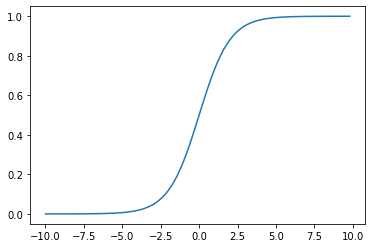

In [125]:
def sigmoid_ex(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return a


x = np.arange(-10, 10, 0.2)

sig = sigmoid_ex(x)

plt.plot(x, sig)
plt.show()

In [126]:
N = 100 #Number of Observations
D = 2   #Number of Independent variables

x = np.random.randn(N,D) #Creating a normally distributed data matrix
ones = np.array([[1]*N]).T #Adding a column of 1 to add in the bias term
xb = np.concatenate((ones,x), axis = 1)

#Randomly Initialize a weight vector to show how to use the sigmoid function
w = np.random.randn(D + 1)

In [127]:
#Multiplying our weights and independent variables using numpy dot function
z = xb.dot(w)

In [128]:
#Creating the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [129]:
#This is the result of our non-linear transformation, we could use these values to predict 0 or 1.
sigmoid(z)

array([0.62123905, 0.97006187, 0.87218739, 0.69077138, 0.75943328,
       0.97893706, 0.0752627 , 0.90215053, 0.49252466, 0.87331118,
       0.93552169, 0.60431731, 0.56397078, 0.48601347, 0.66195199,
       0.15908267, 0.97152107, 0.88737655, 0.30074606, 0.92947056,
       0.35641387, 0.65621349, 0.7484497 , 0.87280905, 0.63016027,
       0.84193071, 0.89377335, 0.8591726 , 0.801651  , 0.5795625 ,
       0.57712368, 0.95993511, 0.29952668, 0.14618741, 0.94378304,
       0.67289003, 0.76021012, 0.18248998, 0.82020501, 0.64875636,
       0.6506782 , 0.57087764, 0.80276584, 0.70776353, 0.93999609,
       0.9394621 , 0.5842325 , 0.90559116, 0.04393011, 0.7156044 ,
       0.49198576, 0.85386993, 0.7840179 , 0.63473138, 0.96969298,
       0.78863055, 0.35955252, 0.87828265, 0.84198819, 0.56718225,
       0.81460295, 0.86150768, 0.84613769, 0.6526506 , 0.02658199,
       0.47247818, 0.59134932, 0.97713832, 0.38473041, 0.54730803,
       0.6630676 , 0.51285792, 0.14136142, 0.67841112, 0.98758

## Preprocessing for logistic regression Ecommerce Data

Some of the setup here looks familiar from the steps above, we want to prepare the data and in some instances there will still be randomly initialized values used instead of actual data. Here our focus shifts from understanding what the sigmoid function is to how to use it with randomly generated weights!

Also in this section, accuracy rates will be calculated to show that with randomly generated weights, our accuracy is well...random

In [130]:
data.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [131]:
def process_data(data):
    dataset = data.values
    
    #split features and labels
    X = dataset[:,:-1]
    Y = dataset[:,-1].astype(np.int32)
    
    
    #Normalize the Independent variables
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
    
    
    N, D = X.shape
    X2 = np.zeros((N, D+3)) #There are four different categorical variables so we have D + 3 s
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n, D-1])
        X2[n,t+D-1] = 1
    
    return X2, Y

In [132]:
def get_binary_data(data):
    x2, y = process_data(data)
    X2 = x2[y<=1]
    Y2 = y[y<=1]
    return X2, Y2

In [133]:
X2, Y2 = get_binary_data(data)

In [134]:
#Setup for the logistic regression model we will use the sigmoid function from above
D = X2.shape[1]
W = np.random.randn(D)
b = 0

def forward (X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y==P)

In [135]:
p_y_given_x = forward(X2, W, b)
predictions = np.round(p_y_given_x)

In [136]:
cr = classification_rate(Y2, predictions)

In [137]:
#Finding the accuracy when we use randomly chosen weights and values
#If you run the code blocks multiple times, the accuracy will be all over the place because we use random weights
print('Accuracy: ' + str(cr))

Accuracy: 0.4371859296482412


# Calculating the Cross entropy loss function

In logistic regression, we aim to minimize the cross entropy or loss function, which is described below, where the first term only matters if the target value is 1, and the second value only matters is the target is 0.

$L = -{t log(y) + (1-t) log(1-y)}$<br>

We can also thing of the loss function in the opposite manner as maximizing the log likelihoood value.<br>
$J = {t log(y) + (1-t) log(1-y)}$<br>

The goal of this section is to understand how the loss function is calculated using randomly assigned values for our variables and weights. For the section below we are minimizing the cost where $T$ is the target value $\epsilon (0,1)$ and Y is the output from the logistic regression model

In [138]:
N = 100 #Number of Observations
D = 2   #Number of Independent variables

X = np.random.randn(N,D)

#Set the first 50 data points to be centered at x = -2 and y = -1
X[:50, :] = X[:50, :] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50)

w = np.random.randn(D + 1)

ones = np.array([[1]*N]).T
xb = np.concatenate((ones,X), axis = 1)

In [139]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1-Y[i])
    return E

In [140]:
z = xb.dot(w)

In [141]:
Y = sigmoid(z)

In [142]:
print(cross_entropy(T, Y))

21.96383890478162


# Maximizing the likelihood

From earlier, we know our loss function takes the form below:

$J = -\sum \limits _{n=1} ^N t_{n}*log(y_{n}) + (1 - t_{n})*log(1-y_{n})$<br>

Can we prove maximizing the log likelihood function is related to minimizing our loss function? We have our logistic regression function 
$p(y=1|x) = \sigma(W ^T X)$<br>

and our likelihood function is (two asterisks indicates the power function):
$L = \Pi _{n=1} ^N  y _{n}**t_{n} + (1-y_{n})**(1-t_{n})$<br>

In our Likelihood equation, $\Pi$ is the symbol for production multiplication ($f_{x}(x_{1}), x_{2}, ...,x_{n} = f_{x}(x_{1})*f_{x}(x_{2})*...*f_{x}(x_{n})$) but when we take the log of the product, the equation changes. The log of a product become sht sum of the logs of the multiplied terms ($ln[f_{x}(x_{1})*f_{x}(x_{2})*...*f_{x}(x_{n}) = \sum \limits _{n=1} ^N ln[f_{X}(x{i}]$)<br>

So if we take the log of the likelihood function we get the function below which is a positive version of our loss function. So when we are looking at logistic regression, we have two options, we can either choose to minimize the loss function, or we can maximize the log likelihood function.

$\ell = \sum \limits _{n=1} ^N t_{n}log(y_{n}) + (1-t_{n})log(1-y_{n})$

# Updating Model Weights with Gradient Descent

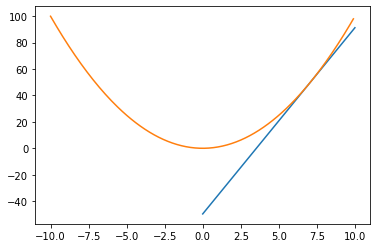

In [143]:
p_x = np.arange(-10,10,.1)
p_y = p_x**2


x_int = 0
y_int = -49.7
slope = 14.1

def find_point(slope, xx, yy):
    b0 = yy - (slope*xx)
    x2 = xx+10
    y2 = (slope*x2)+b0
    
    return x2, y2

x2, y2 = find_point(slope, x_int, y_int)

plt.plot((x_int, x2), (y_int, y2), label = 'line')
plt.plot(p_x,p_y)

plt.show()

The graph above helps illustrate the concept of gradient descent. Consider the orange parabola to be our loss function we want to minimize. In the example above the blue linear line is the starting point for our gradient descent problem where we begin with a randomly initialized set of weights and use them to calculate our cross entropy/loss function.

Once we calculate the loss function we can take steps towards minimizing the cost function using a learning rate. This means as we understand how far off we missed our targets, we can adjust the weights and take steps in the directions of the minimum for our loss function. We effectively change the slope of the blue line such that it is smaller and gets us closer to the global minimum. 

In the example below we have taken steps toward the optimal or minimized point of our loss curve, which can be seen by the change of the slow and movement towards the global minimum point of 0.

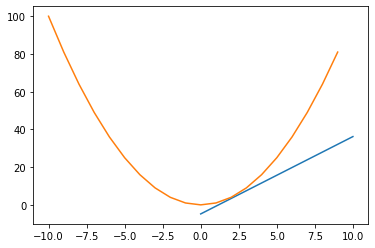

In [144]:
p_x = np.arange(-10,10,1)
p_y = p_x**2
x_int = 0
y_int = -4.8
slope = 4.1

def find_point(slope, xx, yy):
    b0 = yy - (slope*xx)
    x2 = xx+10
    y2 = (slope*x2)+b0
    
    return x2, y2

x2, y2 = find_point(slope, x_int, y_int)

plt.plot((x_int, x2), (y_int, y2), label = 'line')
plt.plot(p_x,p_y)

plt.show()

How do we update the weights of our logistic regression to move down the parabola of the loss function? This is where calculus comes in handy, we will find the derivative of our loss function with respect t othe weights of the model. 

We know the loss function is 
$J = -\sum \limits _{n=1} ^N t_{n}*log(y_{n}) + (1 - t_{n})*log(1-y_{n})$<br>

and we want to find the derivative of our Loss function (J) with respect to w, or the rate of change in our loss function J with respect to the weights of our model (w).

$\frac{\partial{J}}{\partial{W}_{i}} = \sum\limits _{n=1} ^{N} \frac{\partial{J}_{n}}{\partial{y}_{n}} \frac{\partial{y}_{n}}{\partial{a}_{n}} \frac{\partial{a}_{n}}{\partial{w}_{i}}$<br>

Here we are using the chain rule to find the derivative of our loss function (J) with respect to the weights (w). We can separate the above equation into three separate parts and bring it back together at the end. Given the loss function (J) above, what is the partial derivative of J with respect to our model output y?

$\frac{\partial{J}_{n}}{\partial{y}_{n}} = -t_{n} \frac{1}{y_{n}} + (1-t_{n})\frac{1}{1-y_{n}}(-1)$<br>

Now given an activation function $a = w^Tx$ we define our logistic regression output as $y_{n} = \sigma(a_{n})$ = $\frac{1}{1 + e ^a_{n}}$<br>

If we take the partial derivative of y with respect to our activation funcation a we initially get:
$\frac{\partial{y}_{n}}{\partial{a}_{n}} = \frac{-1}{1+e^-a_{n}}(e^-a_{n})(-1)$<br>

and we can simplify the equation above to find that $\frac{\partial{y}_{n}}{\partial{a}_{n}} = y_{n}(1-y_{n})$<br>

Finally, we want to find the partial derivative of our activation funciton with respect to its weights (w). We know that $a_{n} = w^Tx$ and so we can calculate the final partial derivative as:

$\frac{\partial{a}_{n}}{\partial{w_{i}}} = x_{ni}$<br>

We can put all of our partial derivatives together to find an equation that looks something like the one below.

$\frac{\partial{J}}{\partial{w}_{i}} = - \sum \limits _{n=1} ^N \frac{t_{n}}{y_{n}}Y_{n}(1-y_{n})x_{ni} - \frac{1-t_{n}}{1-y_{n}}y_{n}(1-y_{n})x_{ni}$<br>

which can be simplified to:
$\frac{\partial{J}}{\partial{w}_{i}} = \sum \limits _{n=1} ^N (y_{n} - t_{n})x_{ni}$<br>

Now we have our final partial derivative of our loss function J with respect to the weights, which we can use to update the weights of our model using gradient descent. 


# Updating model weights with gradient descent in code
Here we will leverage the sigmoid and cross_entropy functions used above and update our model weights using gradient descent. To update the weights of our model we need a couple of things, a learning rate and the result of our cross entropy loss function. For each iteration, we must adjust the weights such that we continue to approach a global minimum of 0 for our cross entropy loss function. Recall our cross entropy result with respect to the model weights is:
$\frac{\partial{J}}{\partial{w}_{i}} = \sum \limits _{n=1} ^N (y_{n} - t_{n})x_{ni}$<br>

So to adjust our weights we will use the formula below:
$w_{i+1} = -lr * \sum \limits _{n=1} ^N(y_{ni} - t_{ni})*x_{ni}$ where lr is our learning rate and i is the iteration.<br>

We will set the learning rate which will be used as an adjustment to our model, for the example below, we will use a learning rate of 0.001, and the example will use 100 iterations to try to minimize our loss function. We can also will apply this adjustment to our bias term where the adjustment looks like:

$b_{i+1} = -lr * (y_{ni} - t_{ni})$ where lr is our learning rate.<br>

Initial weights:  [ 0.97056879 -0.18310334  3.08502642]
Cross Entropy Result: 5.121684825978551
Cross Entropy Result: 0.4163167621039713
Cross Entropy Result: 0.2511262750923678
Cross Entropy Result: 0.18324823699560908
Cross Entropy Result: 0.1455525425461939
Cross Entropy Result: 0.12136952081050653
Cross Entropy Result: 0.10445737212900821
Cross Entropy Result: 0.0919260409639194
Cross Entropy Result: 0.08224638900439585
Cross Entropy Result: 0.07453082474159485
Final weight: [-0.27040527  2.58515098  4.23644384]


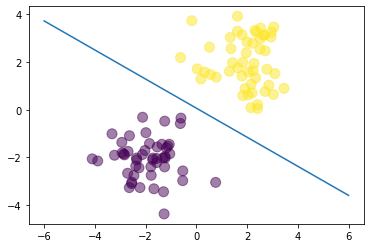

In [190]:
N = 100
D = 2

X = np.random.randn(N,D)

#Set the first 50 data points to be centered at x = -2 and y = -1
X[:50, :] = X[:50, :] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50)

ones = np.array([[1]*N]).T
xb = np.concatenate((ones,X), axis = 1)

learning_rate = 0.1

w = np.random.randn(D+1)
print('Initial weights: ', w)

z = xb.dot(w)

Y = sigmoid(z)

for i in range(100):
    if i%10 == 0:
        print('Cross Entropy Result: ' + str(cross_entropy(T,Y)))
    w += learning_rate*xb.T.dot(T-Y)
    Y = sigmoid(xb.dot(w))

print('Final weight: ' + str(w))


# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

# L2 Regularization 

The sigmoid function has a limit of 0 as our independent variable X approaches negative infinity, and a limit of 1 as X approaches positive infinity. Given a perfectly split dataset and no limit on how many iterations/loops were run, the logistic regression model would above would try to product a final weight set of [0, inf, inf] and overfitting our model. L2 Regularization is also known as Ridge Regression.

Regularization can be used to solve this problem buy penalizing very large weights in the model. L2 Regularization will be covered more in depth in a different notebook. For the purpose of this example, notice we are simply adding a penalty to the adjustment of our model weights of lambda multiplied by the weights. This is the penalty for larger weights, and it will encourage our weights to be closer to zero. 

With our L2 Normalization penalty our weight adjestment is now expressed as:
$w_{i+1} = -lr * \sum \limits _{n=1} ^N(y_{ni} - t_{ni})*x_{ni} - (\lambda * w_{i})$ where lr is our learning rate and i is the iteration and w are our model weights.<br>

Compare the output of our example above to that of L2 regularization and notice the differences in our Cross Entropy Results, but also notice the weights of our L2 Normalized model produced smaller weights. As we normalize the data and penalize larger weights we make sacrifices at times in minimizing our Cross Entropy Loss Function. 

Initial Weights:  [ 1.11165044 -0.6646589   1.60826637]
Cross Entropy Result: 33.643526289324676
Cross Entropy Result: 0.026885010284606714
Cross Entropy Result: 0.04165404740328183
Cross Entropy Result: 0.06197724807239452
Cross Entropy Result: 0.08844572886225122
Cross Entropy Result: 0.12060058298832046
Cross Entropy Result: 0.15630823518528944
Cross Entropy Result: 0.19185682512356497
Cross Entropy Result: 0.22327432841020614
Cross Entropy Result: 0.248046033740522
Final weight: [-0.21966591  2.25742914  2.57252187]


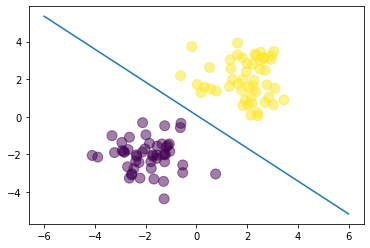

In [191]:
lambda_var = 0.1


learning_rate = 0.1

w = np.random.randn(D+1)
print('Initial Weights: ', w)

z = xb.dot(w)

Y = sigmoid(z)

for i in range(100):
    if i%10 == 0:
        print('Cross Entropy Result: ' + str(cross_entropy(T,Y)))
        
    w += learning_rate*(xb.T.dot(T-Y) - lambda_var*w)
    Y = sigmoid(xb.dot(w))
    
print('Final weight: ' + str(w))


# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

# L1 Regularization

Initial Weights:  [-0.13317534  0.28584443 -0.35719163]
Cross Entropy Result: 80.89385630125432
Cross Entropy Result: 1.0962499986574688e-06
Cross Entropy Result: 3.72646872025066e-08
Cross Entropy Result: 6.7826685546815135e-09
Cross Entropy Result: 2.450695648947813e-09
Cross Entropy Result: 9.390875858566911e-10
Cross Entropy Result: 3.6196579073243664e-10
Cross Entropy Result: 1.3985557157704926e-10
Cross Entropy Result: 5.4134030592867524e-11
Cross Entropy Result: 2.09841033440414e-11
Final weight: [-19.84973827  30.10978467  30.99074132]


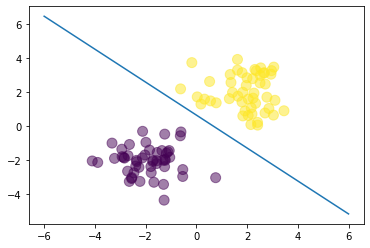

In [192]:
lambda_var_l1 = 2.0


learning_rate = 0.1

w = np.random.randn(D+1)
print('Initial Weights: ', w)

z = xb.dot(w)

Y = sigmoid(z)

for i in range(100):
    if i%10 == 0:
        print('Cross Entropy Result: ' + str(cross_entropy(T,Y)))
        
    w += learning_rate*(xb.T.dot(T-Y) + lambda_var_l1*np.sign(w))
    Y = sigmoid(xb.dot(w))
    
print('Final weight: ' + str(w))


# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

# Training Logistic Model for Ecommerce Data

In [31]:
data.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [63]:
#Separate the train an dtest datasets 50/50
Xtrain = X2[:-100]
Ytrain = Y2[:-100]
Xtest = X2[-100:]
Ytest = Y2[-100:]

#Normalizing the data
for i in (1, 2):
    m = Xtrain[:,i].mean()
    s = Xtrain[:,i].std()
    Xtrain[:,i] = (Xtrain[:,i] - m) / s
    Xtest[:,i] = (Xtest[:,i] - m) / s

X2train = Xtrain[Ytrain <= 1]
Y2train = Ytrain[Ytrain <= 1]
X2test = Xtest[Ytest <= 1]
Y2test = Ytest[Ytest <= 1]

0 0.5139070884252871 0.4109315433019491
1000 0.20375128568034329 0.1297368587611592
2000 0.2030772731166995 0.12576480457423841
3000 0.20304864491837368 0.1250512350859435
4000 0.20304721144721133 0.12489605120401728
5000 0.20304713721812379 0.12486094988360713
6000 0.20304713334536043 0.12485294228718333
7000 0.2030471331429611 0.1248511121376797
8000 0.20304713313237913 0.12485069368670862
9000 0.20304713313182574 0.12485059800269856
Final Weights:  [ 1.13184516  4.90479149  0.31612676  1.35622292 -0.05996325 -1.04511985
 -0.51526682 -0.99887308]
Final train classification_rate: 0.9697986577181208
Final test classification_rate: 0.98


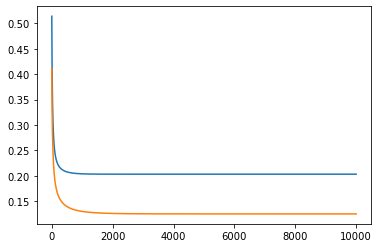

In [62]:
# randomly initialize weights
D = X2train.shape[1]
W = np.random.randn(D) #Randomly initialize the weights, they will be updated later
b = 0 # bias term

# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(X2train, W, b)
    pYtest = forward(X2test, W, b)

    ctrain = cross_entropy(Y2train, pYtrain)
    ctest = cross_entropy(Y2test, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent, adjust the training rates based on the results of our last iteration
    W -= learning_rate*X2train.T.dot(pYtrain - Y2train)
    b -= learning_rate*(pYtrain - Y2train).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print('Final Weights: ', W)


print("Final train classification_rate:", classification_rate(Y2train, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Y2test, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.show()


# Additional Info

In linear regression, the values for our weights can be interpreted as the impact to our dependent variable (y) from a one unit increase to our dependent variable (x) holding everything else constant. However, we cannot interpret our logistic regression weights exactly the same way. 

We know the output of our binary logistic regression model is 0 or 1, so the weight of our independent variables will drive our output predictions closer to 0 or 1. If our weight is big and positive, then a small change in our variable x will push our output closer to 1. Similarly, if our weight is big and negative, then a small change in our variable x will push our output closer to 0.